### Importowanie potrzebnych bibliotek

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix

### 1. Wczytanie i przygotowanie danych

In [2]:
fashion_mnist = keras.datasets.fashion_mnist.load_data()
(x_train, y_train), (x_test, y_test) = fashion_mnist

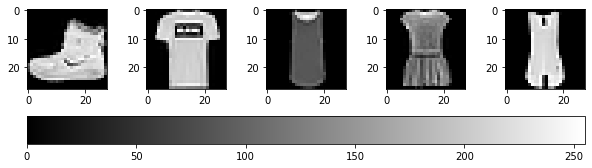

In [3]:
#przykładowe obrazki ze zbioru
fig, axes = plt.subplots(1, 5, figsize = (10, 10))
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
for i in np.arange(0, 1 * 5):
    im = axes[i].imshow(x_train[i].reshape(28, 28), cmap = 'gray')
fig.colorbar(im, ax = axes.ravel().tolist(), orientation = 'horizontal', pad = 0.05)
plt.show()

In [4]:
#standaryzacja cech
x_train = x_train.astype('float32') / 255.0 
x_test = x_test.astype('float32') / 255.0

In [5]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

### 2. Definicja modelu

In [6]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = (28, 28)))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Dense(10, activation = 'softmax'))

### 3. Wyuczenie modelu na zbiorze uczącym

In [7]:
model.compile(optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dropout (Dropout)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [9]:
history = model.fit(x_train,
    y_train,
    epochs = 50,
    batch_size = 128,
    validation_split = 0.2
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 2s 43us/sample - loss: 0.7488 - accuracy: 0.7338 - val_loss: 0.4896 - val_accuracy: 0.8249
Epoch 2/50
48000/48000 [==============================] - 1s 28us/sample - loss: 0.5377 - accuracy: 0.8056 - val_loss: 0.4383 - val_accuracy: 0.8389
Epoch 3/50
48000/48000 [==============================] - 1s 29us/sample - loss: 0.4943 - accuracy: 0.8206 - val_loss: 0.4111 - val_accuracy: 0.8539
Epoch 4/50
48000/48000 [==============================] - 1s 30us/sample - loss: 0.4689 - accuracy: 0.8282 - val_loss: 0.3997 - val_accuracy: 0.8567
Epoch 5/50
48000/48000 [==============================] - 1s 27us/sample - loss: 0.4496 - accuracy: 0.8364 - val_loss: 0.3837 - val_accuracy: 0.8615
Epoch 6/50
48000/48000 [==============================] - 1s 27us/sample - loss: 0.4352 - accuracy: 0.8407 - val_loss: 0.3699 - val_accuracy: 0.8684
Epoch 7/50
48000/48000 [==============================] 

### 4. Wizualizacja procesu uczenia

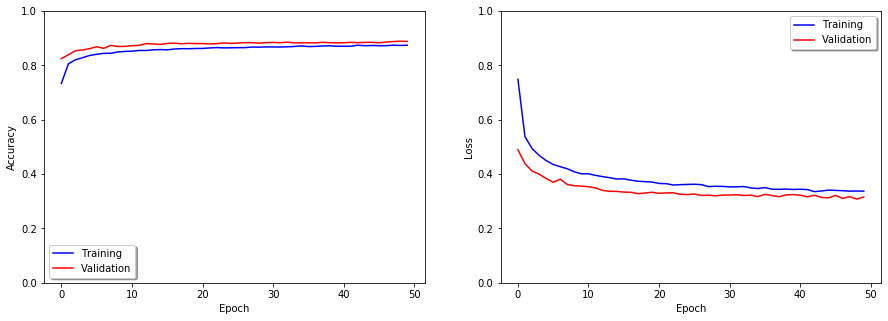

In [10]:
fig, axes = plt.subplots(1, 2, figsize = (15, 5))

axes[0].plot(history.history['accuracy'], color = 'blue', label = 'Training')
axes[0].plot(history.history['val_accuracy'], color = 'red', label = 'Validation')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].set_ylim([0.0, 1])
legend = axes[0].legend(loc = 'best', shadow = True)

axes[1].plot(history.history['loss'], color = 'blue', label = 'Training')
axes[1].plot(history.history['val_loss'], color = 'red', label = 'Validation')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].set_ylim([0.0, 1])
legend = axes[1].legend(loc = 'best', shadow = True)

### 5. Skuteczność modelu na zbiorze testowym

In [11]:
model.evaluate(x_test, y_test) #ewaluacja na danych testowych 

10000/10000 [==============================] - 0s 35us/sample - loss: 0.3405 - accuracy: 0.8776


[0.3405105886936188, 0.8776]

In [12]:
prediction_classes = model.predict_classes(x_test)

In [13]:
class_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Przykładowe przewidywane klasy a oryginalne na zbiorze testowym:

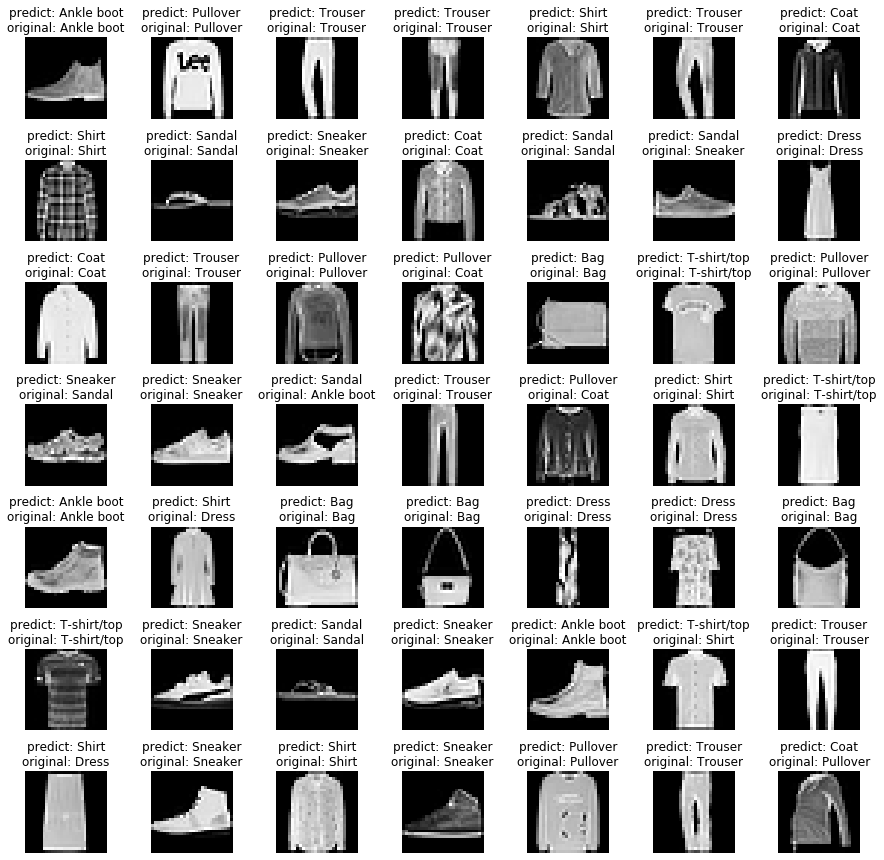

In [14]:
fig, axes = plt.subplots(7, 7, figsize = (15, 15))
axes = axes.ravel()
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
for i in np.arange(0, 7 * 7):
    axes[i].imshow(x_test[i].reshape(28, 28), cmap = 'gray')
    axes[i].set_title('predict: ' + class_name[prediction_classes[i]] + '\noriginal: '  + class_name[np.argmax(y_test, axis = 1)[i]])
    axes[i].axis('off')

### 6. Macierz przynależności na zbiorze testowym

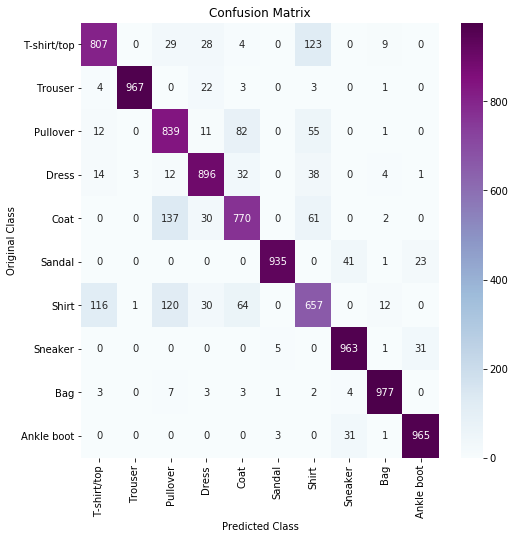

In [15]:
prediction_classes = model.predict_classes(x_test)
original_classes = np.argmax(y_test, axis = 1)
confusionMatrix = confusion_matrix(original_classes, prediction_classes)
fig, axes = plt.subplots(figsize = (8, 8))
sn.heatmap(confusionMatrix, annot = True, cmap = 'BuPu', fmt = '.0f')
axes.set_xticklabels(class_name, rotation = 90)
axes.set_yticklabels(class_name, rotation = 0)
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.title('Confusion Matrix')
plt.show()